# Est-ce que les gens qui se souviennent plus de leur rêves déclarent être plus influencés par leurs rêves ?

**Author** : Laetitia Carli

**Date** : June 2025

## 1. Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import networkx as nx
from statsmodels.miscmodels.ordinal_model import OrderedModel

## 2. Directed acyclic graph

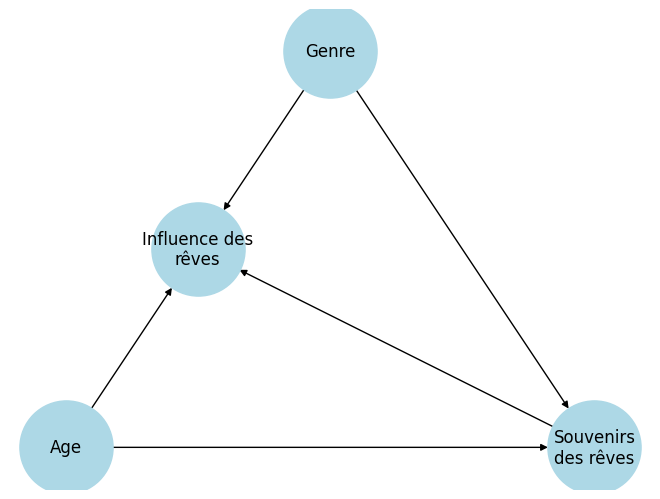

In [2]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Souvenirs\ndes rêves', 'Influence des\nrêves']
G.add_nodes_from(nodes)

edges = [('Souvenirs\ndes rêves', 'Influence des\nrêves'), ('Genre', 'Influence des\nrêves'),
         ('Age', 'Influence des\nrêves'), ('Genre', 'Souvenirs\ndes rêves'), ('Age', 'Souvenirs\ndes rêves')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4500, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

## 3. Data import 

In [3]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 4. Data manipulation

### 4.1 Rename columns

In [5]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})

In [6]:
df = df.rename(columns={'Genre ': 'Genre'})

In [7]:
df = df.rename(columns={'Mes rêves ont déjà influencé mes actions.': 'influence'})

In [8]:
df = df.rename(columns={'Je me souviens souvent de mes rêves.': 'souvenirs'})

### 4.2 Select and clean the data

In [9]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)


In [10]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [11]:
df = df[df['Genre'].isin(["Femme", "Homme"])]

## 5. Data description

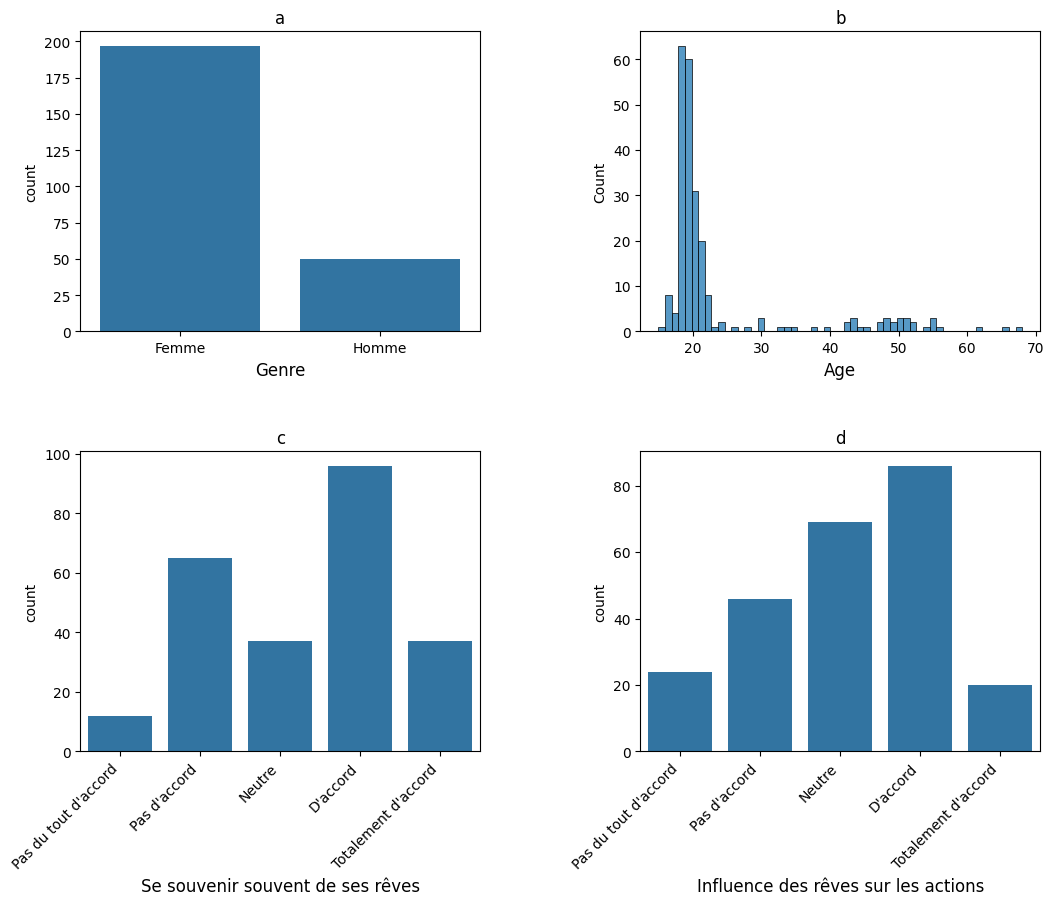

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.countplot(x = df['Genre'], ax = axs[0, 0])
axs[0, 0].set_xlabel("Genre", fontsize = 12)
axs[0, 0].set_title("a")

sns.histplot(x = df['Age'], ax = axs[0, 1])
axs[0, 1].set_xlabel("Age", fontsize = 12)
axs[0, 1].set_title("b")

sns.countplot(x = df['souvenirs'], order=["Pas du tout d'accord",
    "Pas d'accord", "Neutre","D'accord", "Totalement d'accord"], ax = axs[1, 0]) 
for tick in axs[1,0].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[1, 0].set_xlabel("Se souvenir souvent de ses rêves", fontsize = 12)
axs[1, 0].set_title("c")

sns.countplot(x = df['influence'], order=["Pas du tout d'accord",
    "Pas d'accord", "Neutre","D'accord", "Totalement d'accord"], ax = axs[1, 1]) 
for tick in axs[1,1].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[1, 1].set_xlabel("Influence des rêves sur les actions", fontsize = 12)
axs[1, 1].set_title("d")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

## 6. Data modelling

In [13]:
df.dropna(subset = ['Age', 'Genre', 'souvenirs','influence'], inplace=True)

In [14]:
pd.set_option('future.no_silent_downcasting', True)
df['souvenirs'] = df['souvenirs'].astype(str).str.strip().str.lower()
souvenirs_dict = {"pas du tout d'accord": 0,
                    "pas d'accord" : 1,
                     "neutre" : 2,
                     "d'accord" : 3,
                     "totalement d'accord": 4
                    }
df.loc[:,'souvenirs'] = df['souvenirs'].replace(souvenirs_dict)
df['souvenirs'] = df['souvenirs'].astype('int')

In [15]:
pd.set_option('future.no_silent_downcasting', True)
df['influence'] = df['influence'].astype(str).str.strip().str.lower()
influence_dict = {"pas du tout d'accord": 0,
                    "pas d'accord" : 1,
                     "neutre" : 2,
                     "d'accord" : 3,
                     "totalement d'accord": 4
                    }
df.loc[:,'influence'] = df['influence'].replace(influence_dict)
df['influence'] = df['influence'].astype('int')

In [16]:
model = smf.ols(formula = 'influence ~ souvenirs + Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              influence   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.276
Date:                Thu, 19 Jun 2025   Prob (F-statistic):             0.0218
Time:                        09:15:10   Log-Likelihood:                -355.02
No. Observations:                 236   AIC:                             718.0
Df Residuals:                     232   BIC:                             731.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.0077      0.246      8.149      0.000       1.522       2.493
Genre[T.Homme]     0.0900      0.178      0.506      0.613      -0.260       0.440
souvenirs          0.1554      0.063      2.456      0.015       0.031       0.280
Age               -0.0102      0.007     -1.539      0.125      -0.023       0.003
==============================================================================
Omnibus:                       16.416   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.559
Skew:                          -0.332   Prob(JB):                      0.00840
Kurtosis:                       2.271   Cond. No.                         93.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df['Genre'] = df['Genre'].astype(str).str.strip().str.lower()
df.loc[:, 'man_encoded'] = df['Genre'].astype('category').cat.codes

In [18]:
y = df["influence"]
X = df[["Age", "man_encoded", "souvenirs"]]  

model = OrderedModel(y, X, distr='logit')  
result = model.fit(method='bfgs')


result.summary()

Optimization terminated successfully.
         Current function value: 1.449848
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:              influence   Log-Likelihood:                -342.16
Model:                   OrderedModel   AIC:                             698.3
Method:            Maximum Likelihood   BIC:                             722.6
Date:                Thu, 19 Jun 2025                                         
Time:                        09:15:10                                         
No. Observations:                 236                                         
Df Residuals:                     229                                         
Df Model:                           3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0153      0.011     -1.425      0.154      -0.036       0.006
man_encoded     0.2427      0.303      0.800      0.424      -0.352       0.837
souvenirs       0.2443      0.107      2.289      0.022       0.035       0.454
0/1            -2.0642      0.454     -4.546      0.000      -2.954      -1.174
1/2             0.3148      0.144      2.185      0.029       0.032       0.597
2/3             0.1747      0.112      1.561      0.118      -0.045       0.394
3/4             0.7820      0.105      7.470      0.000       0.577       0.987
===============================================================================
"""